#DC_Characters_Analysis

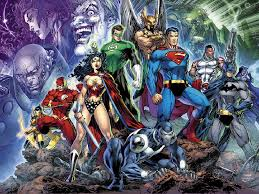

##About DC

DC Comics (originally DC Comics, Inc and also known simply as DC) is an American comic book publisher owned by DC Entertainment, a subsidiary of Warner Bros. Discovery. DC is an initialism for "Detective Comics", an American comic book series first published in 1937. DC Comics is one of the largest and oldest American comic book companies, the first comic under the DC banner being published in 1937.

Originally at 432 Fourth Avenue in Manhattan, New York City, the company offices have been located at 480 and later 575 Lexington Avenue, 909 Third Avenue, 75 Rockefeller Plaza, 666 Fifth Avenue, and 1325 Avenue of the Americas. DC Comics was located at 1700 Broadway in Midtown Manhattan until April 2015, when DC Entertainment transferred its headquarters to Burbank, California.

# Introduction and Overview

This notebook is an exploratory analysis of the DC Characters dataset. We will walk through the complete data science workflow, starting from data loading cleaning, visualizing, and eventually building a simple predictor where applicable. Our aim is to uncover interesting patterns about the characters, with some predictions thrown in for good measure. The notebook is peppered with dry humor and authoritative insights to keep things engaging.

In [ ]:
# Import standard libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # For matplotlib backend
import matplotlib.pyplot as plt
%matplotlib inline

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Set visual style
sns.set(style='whitegrid')

# Data Loading and Exploration

Let's load the DC Characters dataset and take an initial look at the data structure. It's interesting to note that some columns such as 'Unnamed: 0' might simply be indexing and can be dropped during cleaning. We also note that the 'Weight (kg)' column is numeric and can be useful in certain analysis scenarios.

In [ ]:
# Load the dataset
data_path = 'dc_characters_dataset.csv'
df = pd.read_csv(data_path, encoding='MacRoman', delimiter=',')

# Display the first few rows
print('Data Head:')
display(df.head())

# Display basic information
print('Data Info:')
display(df.info())

# Display summary statistics for numeric columns
print('Summary Statistics:')
display(df.describe())

Data Head:


,Unnamed: 0,PageID,Name,Universe,URL,Identity,Gender,Marital Status,Teams,Weight (kg),Creators
0,0,2-6-8-1-7-9-5_(DC_Super_Hero_Girls),2-6-8-1-7-9-5,DC Super Hero Girls,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(DC_S...,Public,Female,Single,Green Lantern Corps,NaN,Billy Tan; Robert Venditti
1,1,2-6-8-1-7-9-5_(Prime_Earth),2-6-8-1-7-9-5,Prime Earth,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(Prim...,Public,Female,Single,Green Lantern Corps,NaN,Billy Tan; Robert Venditti
2,2,2-Face-2_(Batman_in_Bethlehem),2-Face-2,Batman in Bethlehem,https://dc.fandom.com/wiki/2-Face-2_(Batman_in...,NaN,Male,NaN,NaN,NaN,Andy Kubert; Grant Morrison
3,3,3g4_(New_Earth),3g4,New Earth,https://dc.fandom.com/wiki/3g4_(New_Earth),NaN,Male,NaN,NaN,NaN,Jim Calafiore; Peter David
4,4,7-Gorn-7_(Teen_Titans_TV_Series),7-Gorn-7,Teen Titans TV Series,https://dc.fandom.com/wiki/7-Gorn-7_(Teen_Tita...,Public,NaN,NaN,Control Freak,NaN,David Slack


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31465 non-null  int64  
 1   PageID          31465 non-null  object 
 2   Name            31465 non-null  object 
 3   Universe        31450 non-null  object 
 4   URL             31465 non-null  object 
 5   Identity        26220 non-null  object 
 6   Gender          31051 non-null  object 
 7   Marital Status  16450 non-null  object 
 8   Teams           18427 non-null  object 
 9   Weight (kg)     2474 non-null   float64
 10  Creators        28564 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.6+ MB


None

Summary Statistics:


,Unnamed: 0,Weight (kg)
count,31465.000000,2474.000000
mean,15732.000000,143.701698
std,9083.307446,1347.929068
min,0.000000,0.000000
25%,7866.000000,64.000000
50%,15732.000000,79.000000
75%,23598.000000,93.000000
max,31464.000000,54431.000000


# Data Cleaning and Preprocessing

Before diving into our analysis, it's important to ensure the data is in good shape. The following steps include handling missing values, dealing with potential indexing columns (like 'Unnamed: 0'), and preparing the columns for further analysis. If you encounter issues with encoding or missing data, note that the methods used here (e.g., specifying the encoding and using pandas for cleaning) have helped many data scientists overcome similar hurdles.

In [ ]:
# Drop the unnecessary index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Handling missing values
print('Missing values per column:')
display(df.isnull().sum())

# For simplicity, let's fill missing values in categorical columns with 'Unknown'
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# For the 'Weight (kg)' column, fill missing values with the median
if 'Weight (kg)' in df.columns:
    median_weight = df['Weight (kg)'].median()
    df['Weight (kg)'] = df['Weight (kg)'].fillna(median_weight)

# Convert 'Weight (kg)' to numeric if it's not already
df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')

print('Data cleaning complete. Head of cleaned data:')
display(df.head())

Missing values per column:


,0
PageID,0
Name,0
Universe,15
URL,0
Identity,5245
Gender,414
Marital Status,15015
Teams,13038
Weight (kg),28991
Creators,2901


Data cleaning complete. Head of cleaned data:


,PageID,Name,Universe,URL,Identity,Gender,Marital Status,Teams,Weight (kg),Creators
0,2-6-8-1-7-9-5_(DC_Super_Hero_Girls),2-6-8-1-7-9-5,DC Super Hero Girls,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(DC_S...,Public,Female,Single,Green Lantern Corps,79.0,Billy Tan; Robert Venditti
1,2-6-8-1-7-9-5_(Prime_Earth),2-6-8-1-7-9-5,Prime Earth,https://dc.fandom.com/wiki/2-6-8-1-7-9-5_(Prim...,Public,Female,Single,Green Lantern Corps,79.0,Billy Tan; Robert Venditti
2,2-Face-2_(Batman_in_Bethlehem),2-Face-2,Batman in Bethlehem,https://dc.fandom.com/wiki/2-Face-2_(Batman_in...,Unknown,Male,Unknown,Unknown,79.0,Andy Kubert; Grant Morrison
3,3g4_(New_Earth),3g4,New Earth,https://dc.fandom.com/wiki/3g4_(New_Earth),Unknown,Male,Unknown,Unknown,79.0,Jim Calafiore; Peter David
4,7-Gorn-7_(Teen_Titans_TV_Series),7-Gorn-7,Teen Titans TV Series,https://dc.fandom.com/wiki/7-Gorn-7_(Teen_Tita...,Public,Unknown,Unknown,Control Freak,79.0,David Slack


#Exploratory Data Analysis

We now venture into some exploratory data analysis. We'll look at the distribution of the numerical attribute 'Weight (kg)', explore the counts of categorical attributes such as 'Gender', and use a variety of visualization techniques including histograms, bar plots, and box plots. Even if our viewer is primarily a fan of the Caped Crusader rather than statistics, these plots should prove to be both informative and engaging.

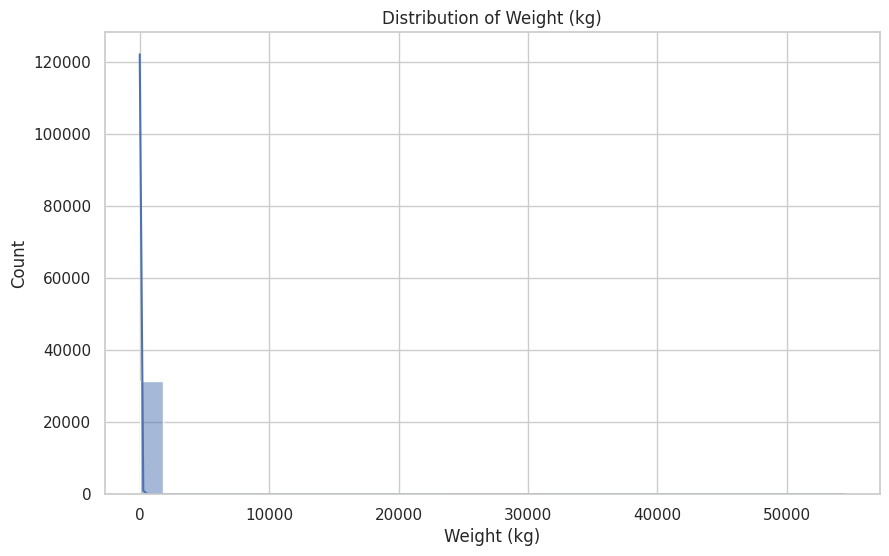

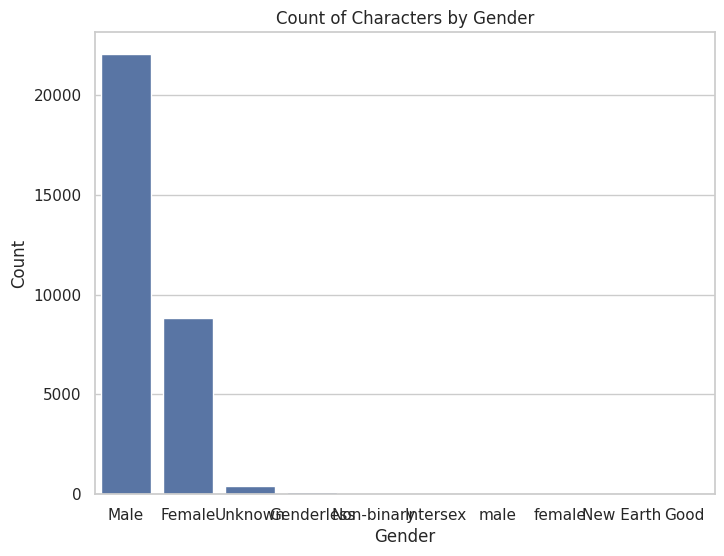

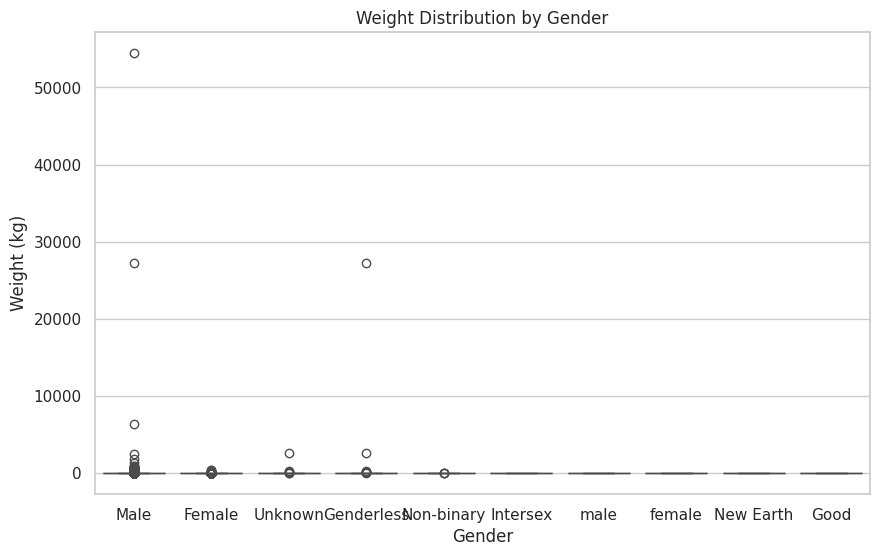

In [ ]:
# Histogram of 'Weight (kg)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight (kg)'], kde=True, bins=30)
plt.title('Distribution of Weight (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

# Countplot for Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Count of Characters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Box Plot of Weight (kg) by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Weight (kg)', order=df['Gender'].value_counts().index)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()

#Modeling and Prediction
It might not be immediately obvious how a prediction could provide value in this dataset, but consider this: can a character's weight provide some insight into their gender? While this is a simplistic assumption, we can try to build a logistic regression model to predict the character's gender using the 'Weight (kg)' as a feature. Note that this is a toy model and should be interpreted with a grain of salt (and possibly a dash of irony).

We will perform the following steps:

Encode the target variable (Gender) as numeric labels.
Use the 'Weight (kg)' as the independent feature.
Split the data into training and testing sets.
Train a logistic regression model.
Evaluate the model using accuracy and a confusion matrix.

Accuracy of the logistic regression model: 0.72


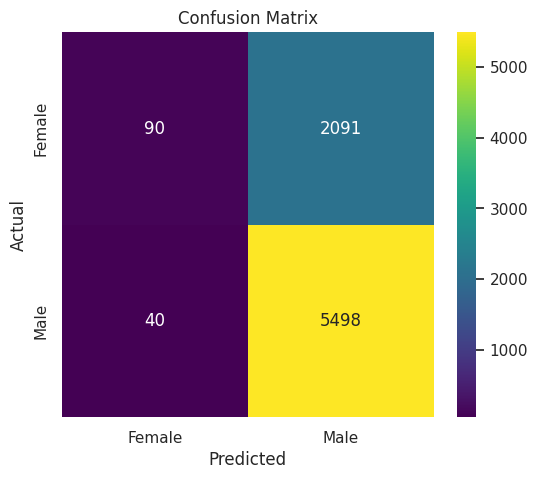

In [ ]:
from sklearn.preprocessing import LabelEncoder

# For simplicity, filter the dataset to only include rows where Gender is either 'Male' or 'Female'
df_model = df[df['Gender'].isin(['Male', 'Female'])].copy()

# Encode the Gender column
le = LabelEncoder()
df_model['Gender_Label'] = le.fit_transform(df_model['Gender'])

# Feature and target
X = df_model[['Weight (kg)']].values
y = df_model['Gender_Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the logistic regression model: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Conclusion and Future Work

In this notebook, we explored the DC Characters dataset from data loading and cleaning all the way to an exploratory analysis and a simple predictive model. Although predicting gender from weight is a somewhat superficial approach, it serves to illustrate the typical workflow in data science. Future explorations might include:

Incorporating more features (such as the textual information from the characters' names or team affiliations) to improve prediction accuracies.
Applying natural language processing techniques to extract insights from text-based columns like 'Creators' or 'Teams'.
Analyzing network relationships between characters based on team affiliations.
Your feedback is valuable. If you found this notebook insightful, consider upvoting it. Happy analyzing.